## Load Libraries

In [90]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as pylab
#configure visualizations
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# # Modelling Helpers
# from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.feature_selection import RFECV

pd.options.display.max_columns=100

## Load Data

In [159]:
train = pd.read_csv('train.csv')
print(train.shape)
testM = pd.read_csv('test.csv')
print(testM.shape)
#combine = [train, testM]

features = pd.concat([train, testM], keys=['train', 'test'])
featuresM = features
features.head()

(1460, 81)
(1459, 80)


1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
train 0       856       854          0   NaN             3     1Fam       TA   
      1      1262         0          0   NaN             3     1Fam       TA   
      2       920       866          0   NaN             3     1Fam       TA   
      3       961       756          0   NaN             3     1Fam       Gd   
      4      1145      1053          0   NaN             4     1Fam       TA   

        BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
train 0           No       706.0         0.0          GLQ          Unf   
      1           Gd       978.0         0.0          ALQ          Unf   
      2           Mn       486.0         0.0          GLQ          Unf   
      3           No       216.0         0.0          ALQ          Unf   
      4           Av       655.0         0.0          GLQ          Unf   

         BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
train 0           1.0           0.0       Gd      150.0          Y       Norm   
      1           0.0           1.0       Gd      284.0          Y      Feedr   
      2           1.0           0.0       Gd      434.0          Y       Norm   
      3           1.0           0.0       TA      540.0          Y       Norm   
      4           1.0           0.0       Gd      490.0          Y       Norm   

        Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
train 0       Norm      SBrkr              0        TA        Gd     VinylSd   
      1       Norm      SBrkr              0        TA        TA     MetalSd   
      2       Norm      SBrkr              0        TA        Gd     VinylSd   
      3       Norm      SBrkr            272        TA        TA     Wd Sdng   
      4       Norm      SBrkr              0        TA        Gd     VinylSd   

        Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
train 0     VinylSd   NaN         NaN           0      PConc         2   
      1     MetalSd   NaN          TA           1     CBlock         2   
      2     VinylSd   NaN          TA           1      PConc         2   
      3     Wd Shng   NaN          Gd           1     BrkTil         1   
      4     VinylSd   NaN          TA           1      PConc         2   

        Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
train 0        Typ       548.0         2.0         TA          RFn         TA   
      1        Typ       460.0         2.0         TA          RFn         TA   
      2        Typ       608.0         2.0         TA          RFn         TA   
      3        Typ       642.0         3.0         TA          Unf         TA   
      4        Typ       836.0         3.0         TA          RFn         TA   

        GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
train 0     Attchd       2003.0       1710         1    GasA        Ex   
      1     Attchd       1976.0       1262         0    GasA        Ex   
      2     Attchd       2001.0       1786         1    GasA        Ex   
      3     Detchd       1998.0       1717         0    GasA        Gd   
      4     Attchd       2000.0       2198         1    GasA        Ex   

        HouseStyle  Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
train 0     2Story   1             1          Gd         Lvl       Gtl   
      1     1Story   2             1          TA         Lvl       Gtl   
      2     2Story   3             1          Gd         Lvl       Gtl   
      3     2Story   4             1          Gd         Lvl       Gtl   
      4     2Story   5             1          Gd         Lvl       Gtl   

         LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass  \
train 0     8450    Inside         65.0      Reg             0          60   
      1     9600       FR2         80.0      Reg             0          20   
      2    11250    Inside         68.0      IR1           

In [160]:
features.columns.values

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolAre

In [161]:
featSelect = list(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 
                   'YearBuilt', 'SalePrice', 'ExterQual', 'BsmtQual',
                   'FireplaceQu', 'HeatingQC', 'GarageFinish', 'Neighborhood'])
print(featSelect)
features = features[featSelect]
print(features.shape)
features.head()

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt', 'SalePrice', 'ExterQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC', 'GarageFinish', 'Neighborhood']
(2919, 13)


OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice ExterQual BsmtQual FireplaceQu HeatingQC GarageFinish  \
train 0   208500.0        Gd       Gd         NaN        Ex          RFn   
      1   181500.0        TA       Gd          TA        Ex          RFn   
      2   223500.0        Gd       Gd          TA        Ex          RFn   
      3   140000.0        TA       TA          Gd        Gd          Unf   
      4   250000.0        Gd       Gd          TA        Ex          RFn   

        Neighborhood  
train 0      CollgCr  
      1      Veenker  
      2      CollgCr  
      3      Crawfor  
      4      NoRidge

## Remove Outliers

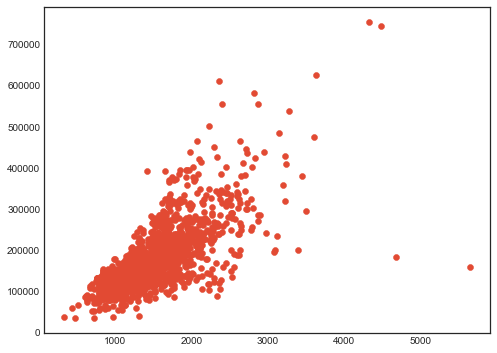

In [162]:
#plt.scatter(trainM['GrLivArea'],trainM['SalePrice'])

plt.scatter(features.loc['train']['GrLivArea'],features.loc['train']['SalePrice'])

In [163]:
gr_outlier = np.where(features.loc['train']['GrLivArea']>4500)
gr_outlier = gr_outlier[0]

features = features.drop(features.index[gr_outlier])
features.shape
#train = train.drop(train.index[train['GrLivArea']>4500])

(2917, 13)

## Missings

In [164]:
percentage_missing = features.isnull().sum()/len(features)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True)#we use inplace=True to make changes to our columns
print(percentage_missing)

TotalBsmtSF     0.000343
GarageCars      0.000343
BsmtQual        0.027768
GarageFinish    0.054508
FireplaceQu     0.486802
SalePrice       0.500171
dtype: float64


In [165]:
quantitative = [f for f in features.columns if features.dtypes[f] != 'object']
quantitative.remove('SalePrice')
print(quantitative)

qualitative = [f for f in features.columns if features.dtypes[f] == 'object']
print(qualitative)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']
['ExterQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC', 'GarageFinish', 'Neighborhood']


In [166]:
for c in list(qualitative):
    features[c] = features[c].astype('category')
    if features[c].isnull().any():
        features[c] = features[c].cat.add_categories(['MISSING'])
        features[c] = features[c].fillna('MISSING')

In [167]:
for c in list(quantitative):
    if features[c].isnull().any():
        features[c] = features[c].fillna(np.nanmean(features[c]))

In [168]:
percentage_missing = features.isnull().sum()/len(features)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True)#we use inplace=True to make changes to our columns
print(percentage_missing)

SalePrice    0.500171
dtype: float64


## Categorical Enumeration

In [169]:
quality_vars = list(['ExterQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC'])

for j in quality_vars:
    enumList = list()
    for i in range(0,len(features)):
        if (features[j].iloc[i]=='Ex'):
            enumList.append(5)
        if (features[j].iloc[i]=='Gd'):
            enumList.append(4)
        if (features[j].iloc[i]=='TA'):
            enumList.append(3)
        if (features[j].iloc[i]=='Fa'):
            enumList.append(2)
        if (features[j].iloc[i]=='Po'):
            enumList.append(1)
        if (features[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (features[j].iloc[i]=='nan'):
            enumList.append(0)
    features[j+'_E'] = enumList

for j in list(['GarageFinish']):
    enumList = list()
    for i in range(0,len(features)):
        if (features[j].iloc[i]=='Fin'):
            enumList.append(3)
        if (features[j].iloc[i]=='RFn'):
            enumList.append(2)
        if (features[j].iloc[i]=='Unf'):
            enumList.append(1)
        if (features[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (features[j].iloc[i]=='nan'):
            enumList.append(0)
    features[j+'_E'] = enumList

In [170]:
features = features.drop(quality_vars, axis=1)
features = features.drop('GarageFinish', axis=1)

In [171]:
features.head()

OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice Neighborhood  ExterQual_E  BsmtQual_E  FireplaceQu_E  \
train 0   208500.0      CollgCr            4           4              0   
      1   181500.0      Veenker            3           4              3   
      2   223500.0      CollgCr            4           4              3   
      3   140000.0      Crawfor            3           3              4   
      4   250000.0      NoRidge            4           4              3   

         HeatingQC_E  GarageFinish_E  
train 0            5               2  
      1            5               2  
      2            5               2  
      3            4               1  
      4            5               2

In [172]:
one_hot = pd.get_dummies(features['Neighborhood'])
features = features.drop('Neighborhood', axis=1)
features = features.join(one_hot)
print(features.shape)
features.describe()

(2917, 37)


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,SalePrice,ExterQual_E,BsmtQual_E,FireplaceQu_E,HeatingQC_E,GarageFinish_E,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,1458.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,6.086390,1498.251628,1049.306651,1.766198,1.567364,1971.287967,180932.919067,3.395612,3.476517,1.766541,4.151183,1.715118,0.009599,0.003428,0.010285,0.037024,0.015084,0.091532,0.035310,0.065821,0.056565,0.031882,0.012684,0.039081,0.151868,0.007885,0.044909,0.024340,0.056908,0.081933,0.016455,0.051766,0.042852,0.062393,0.017484,0.024683,0.008228
std,1.406704,496.908626,429.033799,0.761412,0.552465,30.286991,79495.055285,0.578971,0.904880,1.806293,0.958023,0.897004,0.097519,0.058460,0.100907,0.188854,0.121908,0.288414,0.184594,0.248012,0.231049,0.175716,0.111927,0.193822,0.358955,0.088461,0.207140,0.154129,0.231706,0.274310,0.127240,0.221591,0.202559,0.241909,0.131087,0.155183,0.090348
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,34900.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1126.000000,793.000000,1.000000,1.000000,1953.000000,129925.000000,3.000000,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1444.000000,988.500000,2.000000,2.000000,1973.000000,163000.000000,3.000000,4.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,1743.000000,1302.000000,2.000000,2.000000,2001.000000,214000.000000,4.000000,4.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,5095.000000,5095.000000,5.000000,4.000000,2010.000000,755000.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing value / Imputations

In [173]:
bsmtFill = list()
for i in range(0,len(features)):
    if features['BsmtQual_E'].iloc[i]==0:
        if features['TotalBsmtSF'].iloc[i]==0:
            bsmtFill.append(0)
        if features['TotalBsmtSF'].iloc[i]>0:
            bsmtFill.append(np.median(features['BsmtQual_E']))
    else:
        bsmtFill.append(features['BsmtQual_E'].iloc[i])

features['BsmtQual_E'] = bsmtFill

In [174]:
fireplaceFill = list()
for i in range(0,len(features)):
    if features['FireplaceQu_E'].iloc[i]==0:
        if featuresM['Fireplaces'].iloc[i]==0:
            fireplaceFill.append(0)
        if featuresM['Fireplaces'].iloc[i]>0:
            fireplaceFill.append(np.median(features['FireplaceQu_E']))
    else:
        fireplaceFill.append(features['FireplaceQu_E'].iloc[i])
        
features['FireplaceQu_E'] = fireplaceFill

In [175]:
garagefinishFill = list()
for i in range(0,len(features)):
    if features['GarageFinish_E'].iloc[i]==0:
        if featuresM['GarageArea'].iloc[i]==0:
            garagefinishFill.append(0)
        if np.isnan(featuresM['GarageArea'].iloc[i]):
            garagefinishFill.append(0)
        if featuresM['GarageArea'].iloc[i]>0:
            garagefinishFill.append(np.median(features['GarageFinish_E']))
    else:
        garagefinishFill.append(features['GarageFinish_E'].iloc[i])
        
features['GarageFinish_E'] = garagefinishFill

In [176]:
print(features.shape)
features.head()

(2917, 37)


OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7       1710        856.0         2.0         2       2003   
      1            6       1262       1262.0         2.0         2       1976   
      2            7       1786        920.0         2.0         2       2001   
      3            7       1717        756.0         3.0         1       1915   
      4            8       2198       1145.0         3.0         2       2000   

         SalePrice  ExterQual_E  BsmtQual_E  FireplaceQu_E  HeatingQC_E  \
train 0   208500.0            4         4.0            0.0            5   
      1   181500.0            3         4.0            3.0            5   
      2   223500.0            4         4.0            3.0            5   
      3   140000.0            3         3.0            4.0            4   
      4   250000.0            4         4.0            3.0            5   

         GarageFinish_E  Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
train 0             2.0        0        0       0        0        0        1   
      1             2.0        0        0       0        0        0        0   
      2             2.0        0        0       0        0        0        1   
      3             1.0        0        0       0        0        0        0   
      4             2.0        0        0       0        0        0        0   

         Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  NPkVill  \
train 0        0        0        0       0        0        0      0        0   
      1        0        0        0       0        0        0      0        0   
      2        0        0        0       0        0        0      0        0   
      3        1        0        0       0        0        0      0        0   
      4        0        0        0       0        0        0      0        0   

         NWAmes  NoRidge  NridgHt  OldTown  SWISU  Sawyer  SawyerW  Somerst  \
train 0       0        0        0        0      0       0        0        0   
      1       0        0        0        0      0       0        0        0   
      2       0        0        0        0      0       0        0        0   
      3       0        0        0        0      0       0        0        0   
      4       0        1        0        0      0       0        0        0   

         StoneBr  Timber  Veenker  
train 0        0       0        0  
      1        0       0        1  
      2        0       0        0  
      3        0       0        0  
      4        0       0        0

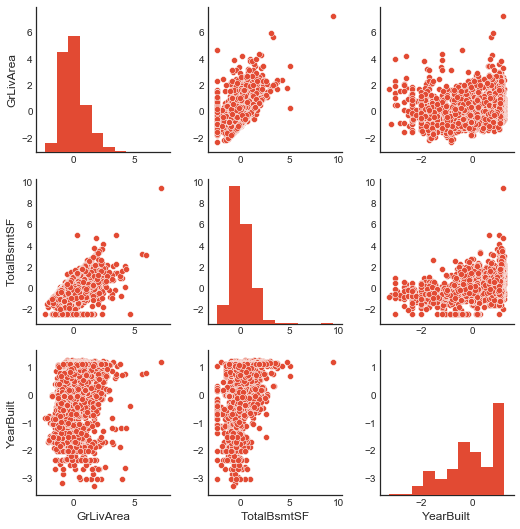

In [177]:
## Standardizing numeric features
numeric_features = features.loc[:,['GrLivArea', 'TotalBsmtSF', 'YearBuilt']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

ax = sns.pairplot(numeric_features_standardized)

GrLivArea      1.068750
TotalBsmtSF    0.676454
YearBuilt     -0.599194
dtype: float64
Index([u'GrLivArea', u'TotalBsmtSF'], dtype='object')
Index([u'GrLivArea', u'TotalBsmtSF'], dtype='object')


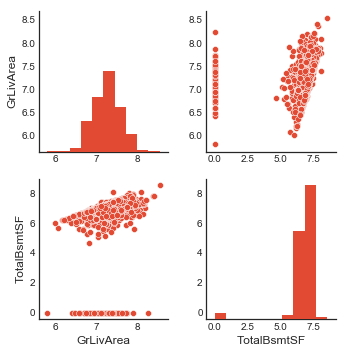

In [178]:
## Adjusting for skew
from scipy.stats import skew 
skewness = numeric_features.apply(lambda x: skew(x))
print(skewness.sort_values(ascending=False))

skewness = skewness[abs(skewness)>0.65]
print(skewness.index)

skew_features = features[skewness.index]
print(skew_features.columns)

#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)

ax = sns.pairplot(skew_features)

In [179]:
features['TotalBsmtSF'] = numeric_features_standardized['TotalBsmtSF']
features['GrLivArea'] = numeric_features_standardized['GrLivArea']
#features['YearBuilt'] = numeric_features_standardized['YearBuilt']

In [180]:
features['SalePrice'] = np.log(features['SalePrice'])
print(features.shape)
features.head()

(2917, 37)


OverallQual  GrLivArea  TotalBsmtSF  GarageCars  FullBath  YearBuilt  \
train 0            7   0.426131    -0.450563         2.0         2       2003   
      1            6  -0.475443     0.495750         2.0         2       1976   
      2            7   0.579077    -0.301390         2.0         2       2001   
      3            7   0.440219    -0.683645         3.0         1       1915   
      4            8   1.408203     0.223044         3.0         2       2000   

         SalePrice  ExterQual_E  BsmtQual_E  FireplaceQu_E  HeatingQC_E  \
train 0  12.247694            4         4.0            0.0            5   
      1  12.109011            3         4.0            3.0            5   
      2  12.317167            4         4.0            3.0            5   
      3  11.849398            3         3.0            4.0            4   
      4  12.429216            4         4.0            3.0            5   

         GarageFinish_E  Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
train 0             2.0        0        0       0        0        0        1   
      1             2.0        0        0       0        0        0        0   
      2             2.0        0        0       0        0        0        1   
      3             1.0        0        0       0        0        0        0   
      4             2.0        0        0       0        0        0        0   

         Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  NPkVill  \
train 0        0        0        0       0        0        0      0        0   
      1        0        0        0       0        0        0      0        0   
      2        0        0        0       0        0        0      0        0   
      3        1        0        0       0        0        0      0        0   
      4        0        0        0       0        0        0      0        0   

         NWAmes  NoRidge  NridgHt  OldTown  SWISU  Sawyer  SawyerW  Somerst  \
train 0       0        0        0        0      0       0        0        0   
      1       0        0        0        0      0       0        0        0   
      2       0        0        0        0      0       0        0        0   
      3       0        0        0        0      0       0        0        0   
      4       0        1        0        0      0       0        0        0   

         StoneBr  Timber  Veenker  
train 0        0       0        0  
      1        0       0        1  
      2        0       0        0  
      3        0       0        0  
      4        0       0        0

## Partition Prepared Data

In [181]:
train = features.loc['train']
trainM = train
print(train.shape)
test = features.loc['test']
testM = test
print(test.shape)

(1458, 37)
(1459, 37)


In [121]:
train.to_csv('train_prep.csv')
test.to_csv('test_prep.csv')

In [182]:
train, test = train_test_split(train, train_size = 0.7)
train=trainM
#test=testM

# MODELING

In [183]:
lmM = LinearRegression()
lmM.fit(trainM.drop('SalePrice', axis=1), trainM['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
train_x = train.drop('SalePrice', axis=1)
print(train_x.shape)

lm = LinearRegression()
lm.fit(train_x, train['SalePrice'])

(1458, 36)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [185]:
test_x = test.drop('SalePrice', axis=1)
print(test_x.shape)

lm_pred = lm.predict(test_x)

(438, 36)


In [186]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test['SalePrice'], lm_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test['SalePrice'], lm_pred))

('Coefficients: \n', array([ 0.07022012,  0.13171455,  0.05727259,  0.06213316, -0.01863311,
        0.00156623,  0.02338254,  0.02044288,  0.01235566,  0.0305337 ,
        0.0170388 , -0.10766369, -0.12243073, -0.16344166, -0.0013701 ,
        0.15072949,  0.0188131 ,  0.1617792 , -0.0316151 , -0.00822085,
       -0.15846205, -0.16991307,  0.00613268,  0.03085393, -0.02727781,
        0.02486761,  0.05000317,  0.06796729, -0.07458376, -0.03048236,
        0.03045548,  0.00113083,  0.02904375,  0.10993807,  0.05005852,
        0.16368807]))
Mean squared error: 0.02
Variance score: 0.88


In [187]:
pd.DataFrame({'Features': train_x.columns.values, 'LM Coefficients': lm.coef_})

,Features,LM Coefficients
0,OverallQual,0.070220
1,GrLivArea,0.131715
2,TotalBsmtSF,0.057273
3,GarageCars,0.062133
4,FullBath,-0.018633
5,YearBuilt,0.001566
6,ExterQual_E,0.023383
7,BsmtQual_E,0.020443
8,FireplaceQu_E,0.012356
9,HeatingQC_E,0.030534


438


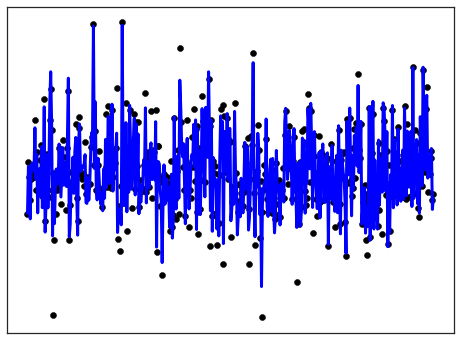

In [188]:
# Plot outputs
plt.scatter(range(0,len(test_x)), test['SalePrice'],  color='black')
plt.plot(range(0,len(test_x)), lm_pred, color='blue', linewidth=3)

print(len(test['SalePrice']))

plt.xticks(())
plt.yticks(())

plt.show()

Text(0.5,1,u'Actual vs. Predicted Prices')

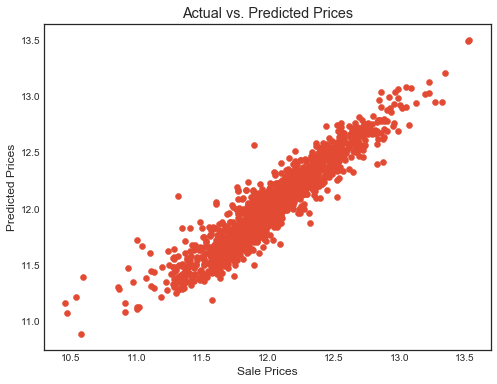

In [189]:
plt.scatter(train['SalePrice'], lm.predict(train_x))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

#convert back from log

In [190]:
pred_vals = lm.predict(train_x)
#print(np.where(train['SalePrice']<12.5))
p2 = np.where(train['SalePrice']<12.5)
outl = (np.where(pred_vals[p2]>12.75))
#outl = np.where(pred_vals[np.where(train['SalePrice']<12.5)]>12.75)

#print(p2)
print(outl[0])
print(int(outl[0][0]))
#print(int(outl[0][1]))
print(pred_vals[p2][outl])
pList = [p2][0][0]
#print(len(pList))
#print(pList[[323,889]])
train.iloc[pList[outl[0]]]

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

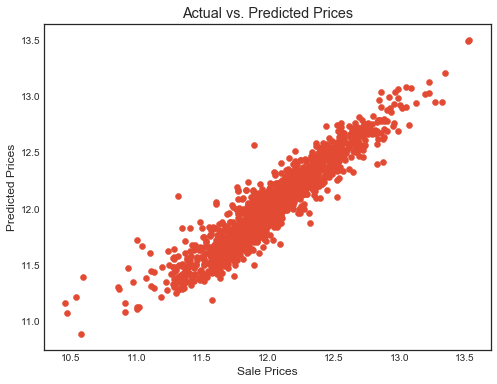

In [191]:
plt.scatter(train['SalePrice'], lm.predict(train_x))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.scatter(train.iloc[pList[[outl[0]]]]['SalePrice'], pred_vals[p2][outl], color='blue')
#plt.scatter(X[i], Y[i], Z[i], color=colors[i])

#convert back from log

Text(0.5,1,u'Actual vs. Predicted Prices')

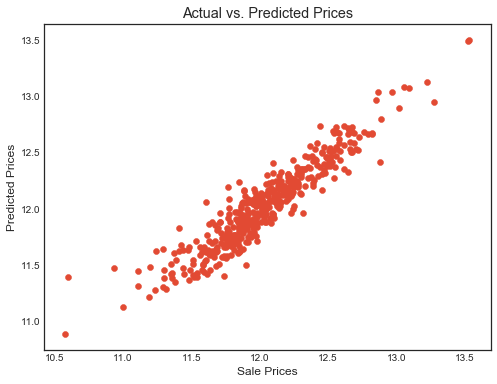

In [192]:
plt.scatter(test['SalePrice'], lm_pred)
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

#convert back from log

1271    185750.0
625     160000.0
165     127500.0
347     157500.0
119     163990.0
285     164700.0
790     160200.0
554     284000.0
1411    140000.0
Name: SalePrice, dtype: float64
12.2476943202


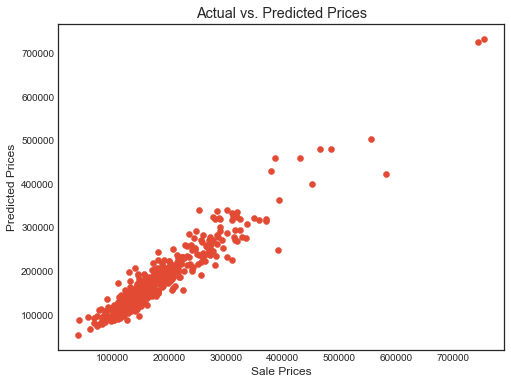

In [193]:
plt.scatter(np.exp(test['SalePrice']), np.exp(lm_pred))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

print(np.exp(test['SalePrice'])[1:10])

print(np.log(208500))

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [194]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [195]:
get_score(lm_pred, test['SalePrice'])

R2: 0.864892515601
RMSE: 0.141453416149


In [196]:
train_test(lm, train_x, test_x, train['SalePrice'], test['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2: 0.864626479339
RMSE: 0.137974682146
Test
R2: 0.864892515601
RMSE: 0.141453416149


In [197]:
def error(actual, predicted):
    actual = (actual)
    predicted = (predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

error(test['SalePrice'], lm_pred)

0.14145341614905768

In [199]:
lasso = LassoLarsCV(fit_intercept=True, max_iter=100000)

# Create linear regression object with a ridge coefficient 0.5
#ridge = Ridge(fit_intercept=True, alpha=0.5)

lasso.fit(train_x, train['SalePrice'])

lasso_pred = lasso.predict(test_x)
get_score(lasso_pred, test['SalePrice'])

R2: 0.860804210914
RMSE: 0.142028359795


In [200]:
elastic = ElasticNet(fit_intercept=True, max_iter=100000)

# Create linear regression object with a ridge coefficient 0.5
#ridge = Ridge(fit_intercept=True, alpha=0.5)

elastic.fit(train_x, train['SalePrice'])

elastic_pred = elastic.predict(test_x)
get_score(elastic_pred, test['SalePrice'])

R2: -1.2425273606
RMSE: 0.333861029567


In [158]:
test_orig = pd.read_csv('test.csv')
#print(test_orig['Id'].head())
pred_sub = np.exp(lmM.predict(testM.drop('SalePrice', axis=1)))
submission = pd.DataFrame({'Id': test_orig['Id'], 'SalePrice': pred_sub})
print(submission.head())
submission.to_csv('submission_DTR.csv')

     Id      SalePrice
0  1461  111436.872065
1  1462  141357.182677
2  1463  165041.266002
3  1464  181069.921996
4  1465  229890.751689


In [42]:
lasso = LassoLarsCV(fit_intercept=True, max_iter=100000)

# Create linear regression object with a ridge coefficient 0.5
#ridge = Ridge(fit_intercept=True, alpha=0.5)

lasso.fit(trainM.drop('SalePrice', axis=1), trainM['SalePrice'])

lasso_pred = np.exp(lasso.predict(testM.drop('SalePrice', axis=1)))

submission = pd.DataFrame({'Id': test_orig['Id'], 'SalePrice': lasso_pred})
print(submission.head())
submission.to_csv('submission_lasso_DTR.csv')

     Id      SalePrice
0  1461  115174.040719
1  1462  139105.696048
2  1463  166888.400524
3  1464  181225.803990
4  1465  225525.568523


### Investigate the outlier prediction values

Text(0.5,1,u'Actual vs. Predicted Prices')

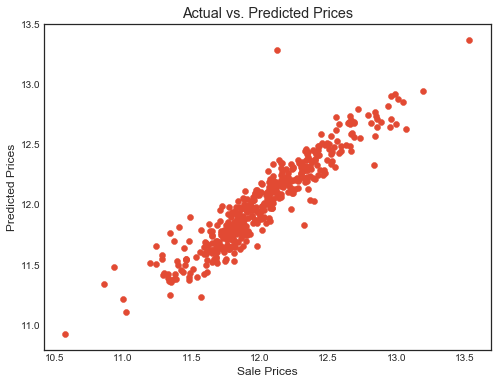

In [43]:
plt.scatter(test['SalePrice'], lm.predict(test.drop('SalePrice', axis=1)))
plt.xlabel('Sale Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

#convert back from log

XGBoost, Ridge, Lasso and Elastic-Net regularization
https://www.kaggle.com/tannercarbonati/detailed-data-analysis-ensemble-modeling

### Lasso Model

In [ ]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature+'2'] = train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quantitative + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

Can also use lasso or ridge regression as wrapper filter methods for best feature selection

In [ ]:
import patsy

Y, X = patsy.dmatrices(
    "SalePrice ~ \
        GarageCars + \
        np.log1p(BsmtFinSF1) + \
        ScreenPorch + \
        Condition1_E + \
        Condition2_E + \
        WoodDeckSF + \
        np.log1p(LotArea) + \
        Foundation_E + \
        MSZoning_E + \
        MasVnrType_E + \
        HouseStyle_E + \
        Fireplaces + \
        CentralAir_E + \
        BsmtFullBath + \
        EnclosedPorch + \
        PavedDrive_E + \
        ExterQual_E + \
        bs(OverallCond, df=7, degree=1) + \
        bs(MSSubClass, df=7, degree=1) + \
        bs(LotArea, df=2, degree=1) + \
        bs(FullBath, df=3, degree=1) + \
        bs(HalfBath, df=2, degree=1) + \
        bs(BsmtFullBath, df=3, degree=1) + \
        bs(TotRmsAbvGrd, df=2, degree=1) + \
        bs(LandSlope_E, df=2, degree=1) + \
        bs(LotConfig_E, df=2, degree=1) + \
        bs(SaleCondition_E, df=3, degree=1) + \
        OverallQual + np.square(OverallQual) + \
        GrLivArea + np.square(GrLivArea) + \
        Q('1stFlrSF') + np.square(Q('1stFlrSF')) + \
        Q('2ndFlrSF') + np.square(Q('2ndFlrSF')) +  \
        TotalBsmtSF + np.square(TotalBsmtSF) +  \
        KitchenAbvGr + np.square(KitchenAbvGr) +  \
        YearBuilt + np.square(YearBuilt) + \
        Neighborhood_E + np.square(Neighborhood_E) + \
        Neighborhood_E:OverallQual + \
        MSSubClass:BldgType_E + \
        ExterQual_E:OverallQual + \
        PoolArea:PoolQC_E + \
        Fireplaces:FireplaceQu_E + \
        OverallQual:KitchenQual_E + \
        GarageQual_E:GarageCond + \
        GarageArea:GarageCars + \
        Q('1stFlrSF'):TotalBsmtSF + \
        TotRmsAbvGrd:GrLivArea",
    train.to_dict('list'))

ridge = linear_model.RidgeCV(cv=10)
ridge.fit(X, np.log(Y))
Ypred = np.exp(ridge.predict(X))
print(error(Y,Ypred))

In [ ]:
import copy
X_train_rare = copy.copy(X_train)
X_test_rare = copy.copy(X_test)
X_train_rare["test"]=0
X_test_rare["test"]=1
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
names = list(X_train_rare.columns.values)
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
for i in names:
    temp_df.loc[temp_df[i].value_counts()[temp_df[i]].values < 20, i] = "RARE_VALUE"
for i in range(temp_df.shape[1]):
    temp_df.iloc[:,i]=temp_df.iloc[:,i].astype('str')
X_train_rare = temp_df[temp_df["test"]=="0"].iloc[:,:-1].values
X_test_rare = temp_df[temp_df["test"]=="1"].iloc[:,:-1].values
for i in range(X_train_rare.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(temp_df.iloc[:,:-1].iloc[:, i])
    les.append(le)
    X_train_rare[:, i] = le.transform(X_train_rare[:, i])
    X_test_rare[:, i] = le.transform(X_test_rare[:, i])
enc.fit(X_train_rare)
X_train_rare = enc.transform(X_train_rare)
X_test_rare = enc.transform(X_test_rare)
l.fit(X_train_rare,y_train)
y_pred = l.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
r.fit(X_train_rare,y_train)
y_pred = r.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
print(X_train_rare.shape)